## Reading Data


In [1]:
import pandas as pd

train = pd.read_csv('twitter_training.csv', header=None)
test = pd.read_csv('twitter_test.csv', header=None)

train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
train.describe()

,0
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [5]:
train.isnull().sum()

0      0
1      0
2      0
3    686
dtype: int64

In [6]:
train.duplicated().sum()

2700

In [7]:
train.dropna(inplace=True)
train.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [8]:
train.drop_duplicates(inplace=True)
train.duplicated().sum()

0

In [9]:
train.columns = ['id', 'entity', 'sentiment', 'tweet']
test.columns = ['id', 'entity', 'sentiment', 'tweet']

print(train.shape, test.shape)
train['sentiment'].value_counts()

(71656, 4) (1000, 4)


sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

## Preprocessing


In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess(text):
    if pd.isna(text):
        return ""
    # remove urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # remove mentions and RT
    text = re.sub(r'@\w+|RT', '', text)
    # remove hashtags symbol but keep the text: #happy -> happy
    text = re.sub(r'#', '', text)
    # keep letters and numbers and spaces
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower().strip()
    tokens = [w for w in text.split() if w not in stop_words and len(w) > 1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)


train['clean'] = train['tweet'].apply(preprocess)
test['clean'] = test['tweet'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
train.head()

,id,entity,sentiment,tweet,clean
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder


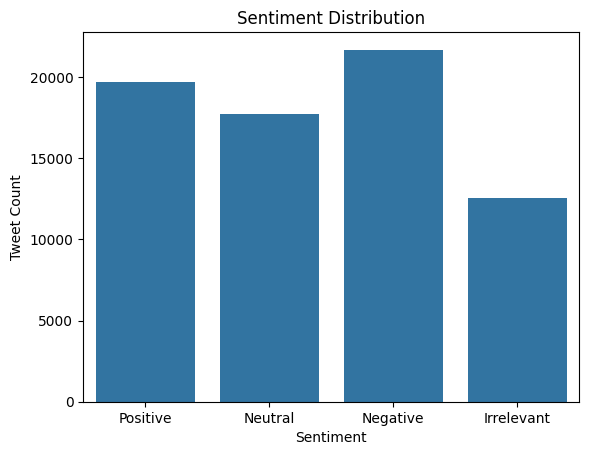

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=train['sentiment'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

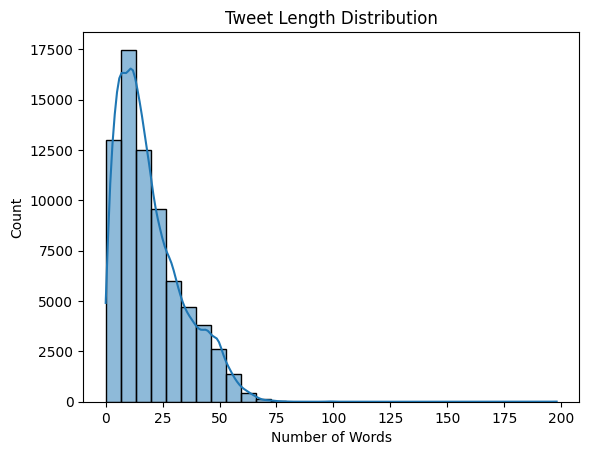

In [13]:
train['tweet_length'] = train['tweet'].apply(lambda x: len(str(x).split()))
sns.histplot(train['tweet_length'], bins=30, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words")
plt.show()

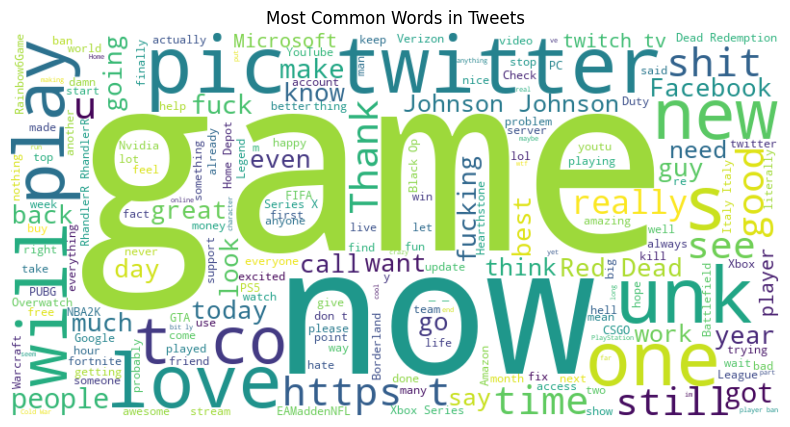

In [14]:
from collections import Counter
from wordcloud import WordCloud

text = " ".join(str(tweet) for tweet in train['tweet'])
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")
plt.show()

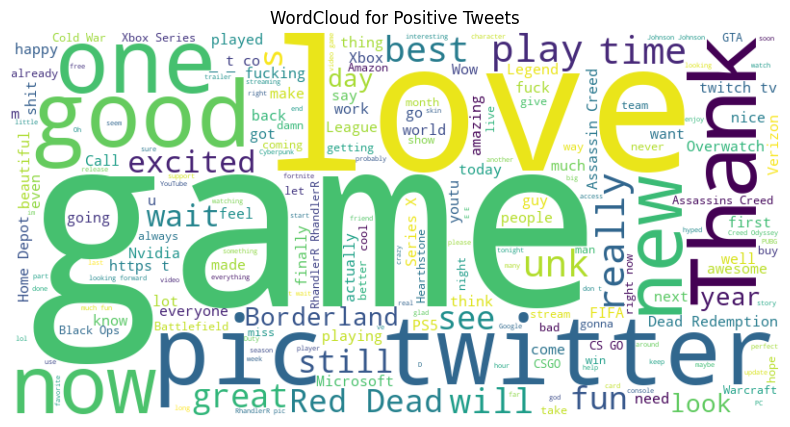

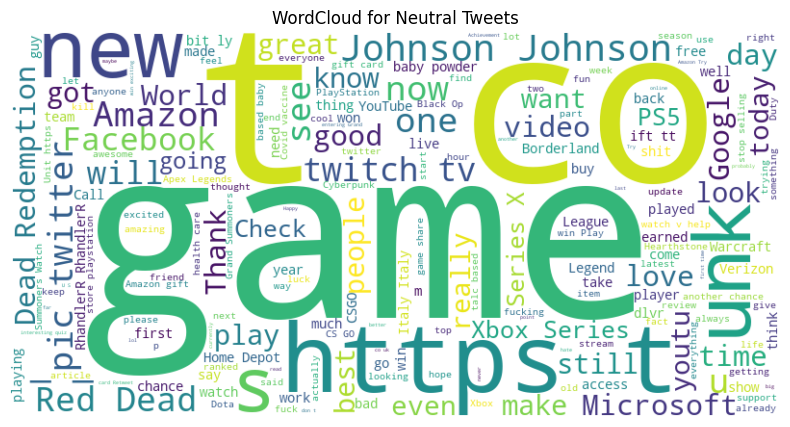

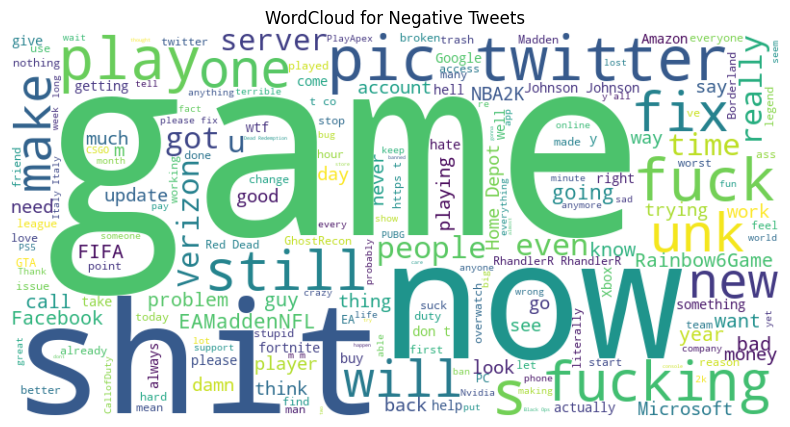

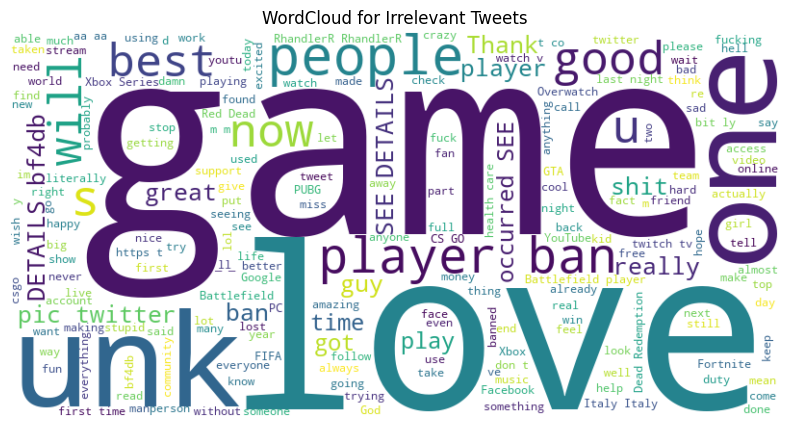

In [15]:
for label in train['sentiment'].unique():
    subset = train[train['sentiment'] == label]
    text = " ".join(str(tweet) for tweet in subset['tweet'])
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {label} Tweets")
    plt.show()

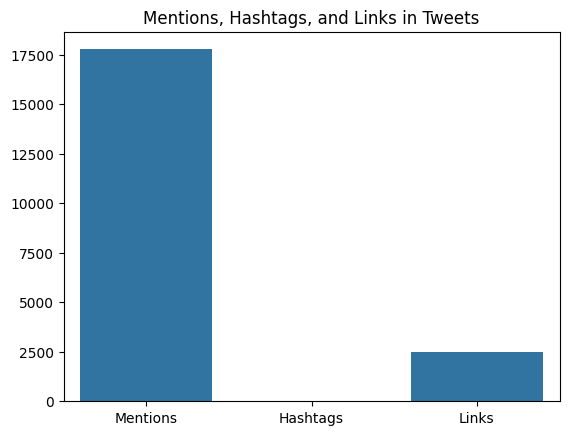

In [16]:
train['mentions'] = train['tweet'].str.count(r'@\w+')
train['hashtags'] = train['tweet'].str.count(r'#\w+')
train['links'] = train['tweet'].str.count(r'http')

sns.barplot(x=['Mentions', 'Hashtags', 'Links'],
            y=[train['mentions'].sum(), train['hashtags'].sum(), train['links'].sum()])
plt.title("Mentions, Hashtags, and Links in Tweets")
plt.show()

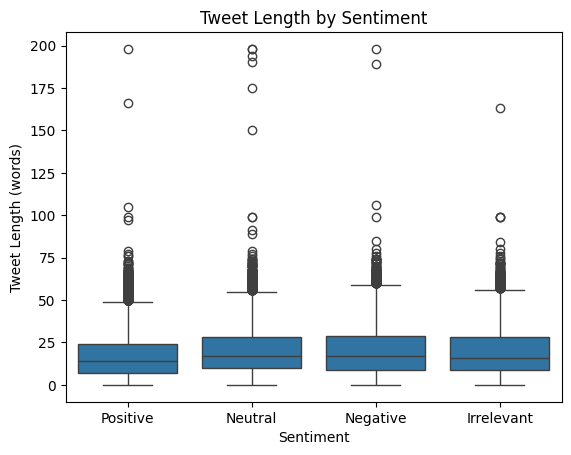

In [17]:
sns.boxplot(x=train['sentiment'], y=train['tweet_length'])
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (words)")
plt.show()

## Label Encoding


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['y'] = le.fit_transform(train['sentiment'])
test['y'] = le.transform(test['sentiment'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}


## Train/Validation split


In [19]:
from sklearn.model_selection import train_test_split
X = train['clean']
y = train['y']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## Text Representation (TF-IDF & BOW)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words (unigrams + bigrams)
cv = CountVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_bow = cv.fit_transform(X_train)
X_val_bow = cv.transform(X_val)

# TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

## Train Logistic Regression


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000),
                    params, cv=3, scoring='f1_weighted')
grid.fit(X_train_tfidf, y_train)
print(grid.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [25]:
best_model = grid.best_estimator_
best_model.fit(X_train_tfidf, y_train)
y_preds = best_model.predict(X_val_tfidf)

Accuracy: 0.7632570471671783

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72      2507
           1       0.75      0.84      0.79      4340
           2       0.77      0.71      0.74      3542
           3       0.77      0.78      0.77      3943

    accuracy                           0.76     14332
   macro avg       0.77      0.75      0.76     14332
weighted avg       0.76      0.76      0.76     14332



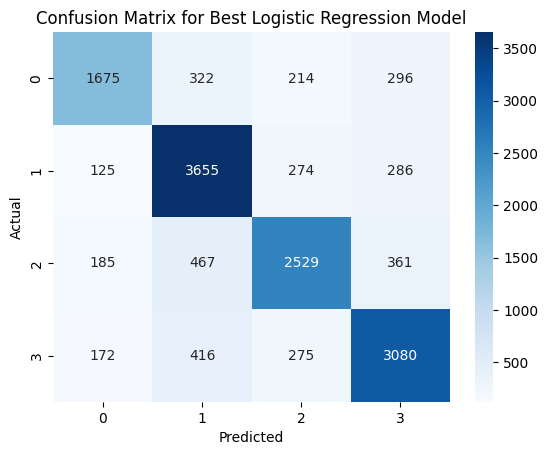

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_val, y_preds))
print("\nClassification Report:\n", classification_report(y_val, y_preds))

cm = confusion_matrix(y_val, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Logistic Regression Model')
plt.show()

## Train Ensemble Models


In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', LinearSVC()),
    ('nb', MultinomialNB())
], voting='hard')

voting.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('svc', LinearSVC()), ('nb', MultinomialNB())])

Accuracy: 0.7288584984649735

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66      2507
           1       0.71      0.84      0.77      4340
           2       0.75      0.65      0.69      3542
           3       0.73      0.77      0.75      3943

    accuracy                           0.73     14332
   macro avg       0.73      0.71      0.72     14332
weighted avg       0.73      0.73      0.73     14332



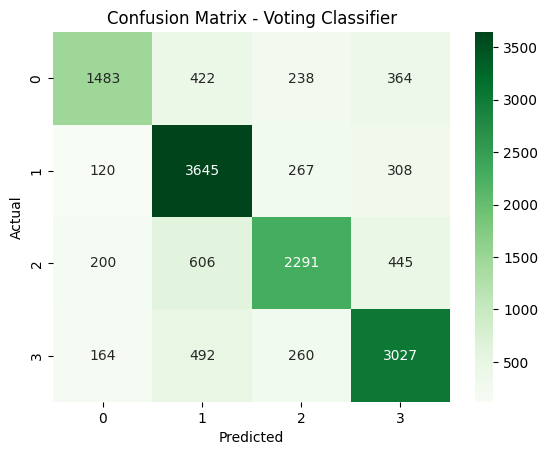

In [28]:
y_pred_voting = voting.predict(X_val_tfidf)

print("Accuracy:", accuracy_score(y_val, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_val, y_pred_voting))

cm = confusion_matrix(y_val, y_pred_voting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Train Random Forest (Best one)


Accuracy: 0.8734

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.86      2507
           1       0.88      0.91      0.89      4340
           2       0.89      0.85      0.87      3542
           3       0.82      0.91      0.86      3943

    accuracy                           0.87     14332
   macro avg       0.88      0.86      0.87     14332
weighted avg       0.88      0.87      0.87     14332



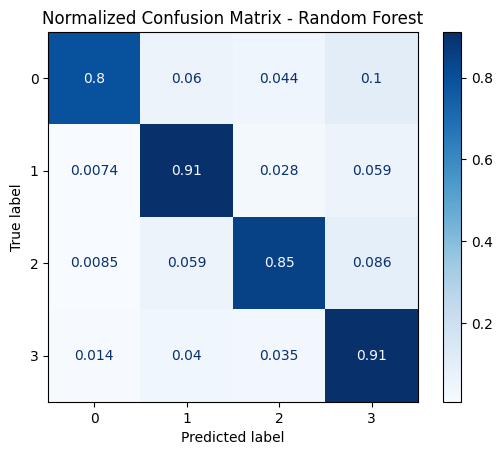

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_tfidf, y_train)

y_pred = rf_model.predict(X_val_tfidf)

acc = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, y_pred))

ConfusionMatrixDisplay.from_predictions(
    y_val, y_pred, cmap="Blues", normalize="true")
plt.title("Normalized Confusion Matrix - Random Forest")
plt.show()